In [2]:
import pandas as pd

# Cargar datos desde el archivo CSV
df = pd.read_csv('netflix_titles.csv')

# Encontrar los tipos únicos de contenido
types = df['type'].unique()

# Imprimir los tipos encontrados
print("Tipos de contenido:", types)
print("Cantidad de tipos:", len(types))


Tipos de contenido: ['Movie' 'TV Show']
Cantidad de tipos: 2


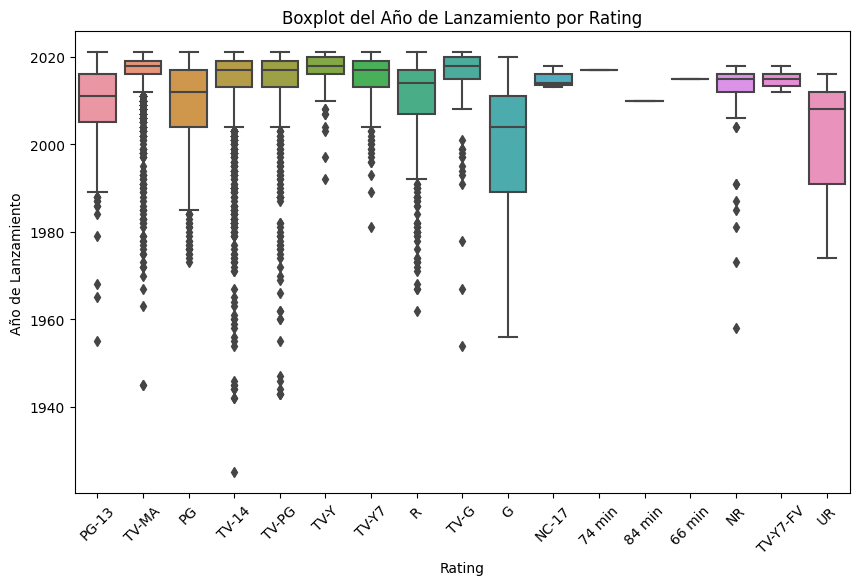

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar boxplots para el rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='release_year', data=df)
plt.title('Boxplot del Año de Lanzamiento por Rating')
plt.xlabel('Rating')
plt.ylabel('Año de Lanzamiento')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

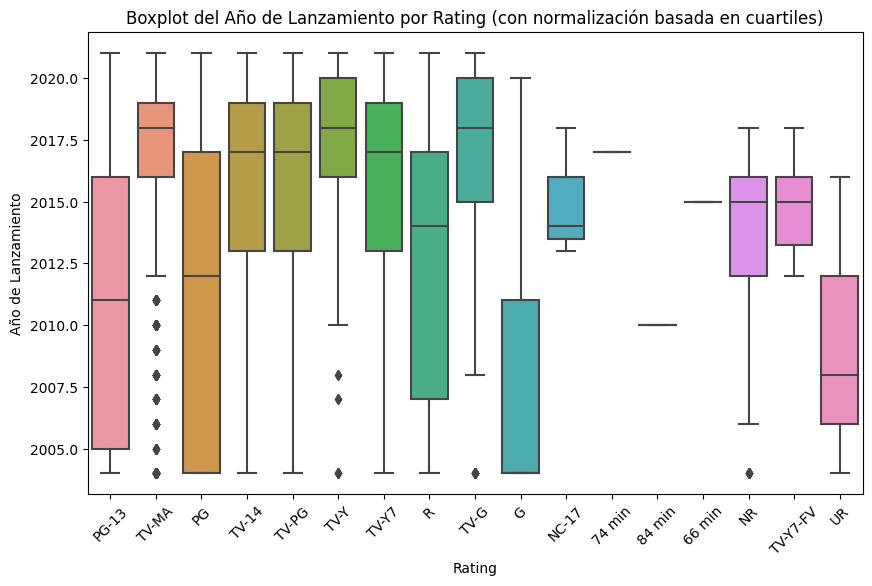

In [7]:
import numpy as np
# Calcular los cuartiles del año de lanzamiento
Q1 = df['release_year'].quantile(0.25)
Q3 = df['release_year'].quantile(0.75)
IQR = Q3 - Q1

# Definir el rango intercuartil para filtrar los valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Normalizar los valores atípicos dentro del rango intercuartil
df['release_year'] = df['release_year'].clip(lower=lower_bound, upper=upper_bound)

# Graficar boxplots para el rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='release_year', data=df)
plt.title('Boxplot del Año de Lanzamiento por Rating (con normalización basada en cuartiles)')
plt.xlabel('Rating')
plt.ylabel('Año de Lanzamiento')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()
#El boxplot muestra que la distribución del rating por año de lanzamiento es asimétrica a la derecha. 
#Esto significa que hay más películas y series con ratings altos en los últimos años.

C:\Users\renzo\AppData\Local\Temp\ipykernel_11152\3676677562.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration'] = df_movies['duration'].apply(duration_to_minutes)
C:\Users\renzo\AppData\Local\Temp\ipykernel_11152\3676677562.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['release_year'] = pd.to_datetime(df_movies['release_year'], format='%Y').dt.year


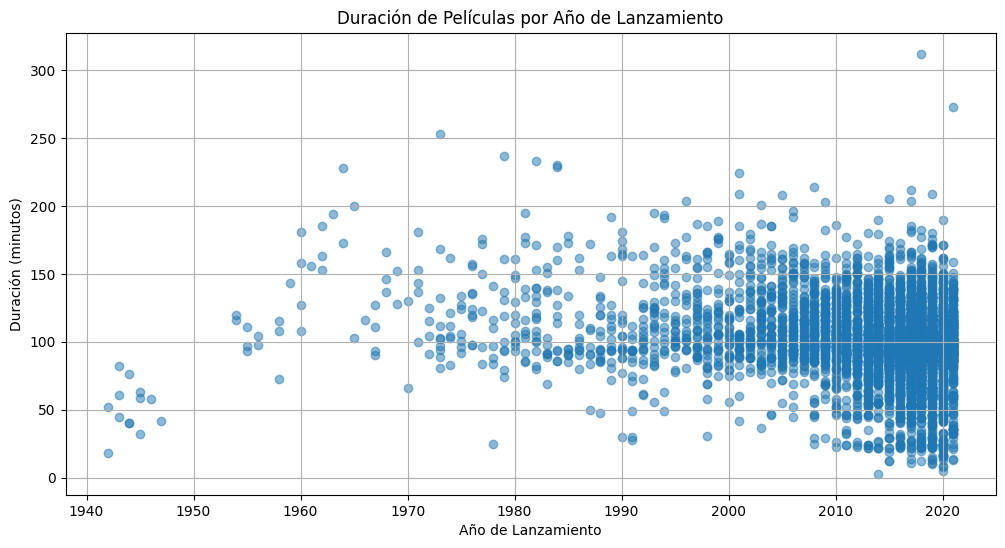

In [23]:
# Filtrar solo los registros de tipo "Movie" y eliminar filas con valores nulos en 'duration'
df_movies = df[(df['type'] == 'Movie') & df['duration'].notna()]

# Convertir la columna 'duration' a minutos
def duration_to_minutes(duration):
    if 'min' in str(duration):  
        return int(str(duration).split()[0])
    else:
        return None

df_movies['duration'] = df_movies['duration'].apply(duration_to_minutes)


# Truncar la fecha de lanzamiento al año
df_movies['release_year'] = pd.to_datetime(df_movies['release_year'], format='%Y').dt.year

# Eliminar filas con valores nulos en 'release_year'
df_movies = df_movies.dropna(subset=['release_year'])

# Graficar histograma
plt.figure(figsize=(12, 6))
plt.scatter(df_movies['release_year'], df_movies['duration'], alpha=0.5)
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Duración (minutos)')
plt.title('Duración de Películas por Año de Lanzamiento')
plt.grid(True)
plt.show()
#De acuerdo con el grafico gran parte de las peliculas lanzadas entre 2010 y 2020
#tienden a durar entre 50 a 150 minutos.

In [28]:
# Filtrar solo los registros de tipo "TV Show"
df_tv_shows = df[df['type'] == 'TV Show']

# Obtener todos los valores únicos de la duración de TV Shows
unique_durations = df_tv_shows['duration'].unique()

print("Valores únicos de duración de TV Shows:")
print(unique_durations)

Valores únicos de duración de TV Shows:
['2 Seasons' '1 Season' '9 Seasons' '4 Seasons' '5 Seasons' '3 Seasons'
 '6 Seasons' '7 Seasons' '10 Seasons' '8 Seasons' '17 Seasons'
 '13 Seasons' '15 Seasons' '12 Seasons' '11 Seasons']


C:\Users\renzo\AppData\Local\Temp\ipykernel_11152\1921018037.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv_shows['release_year'] = pd.to_datetime(df_tv_shows['release_year'], format='%Y').dt.year


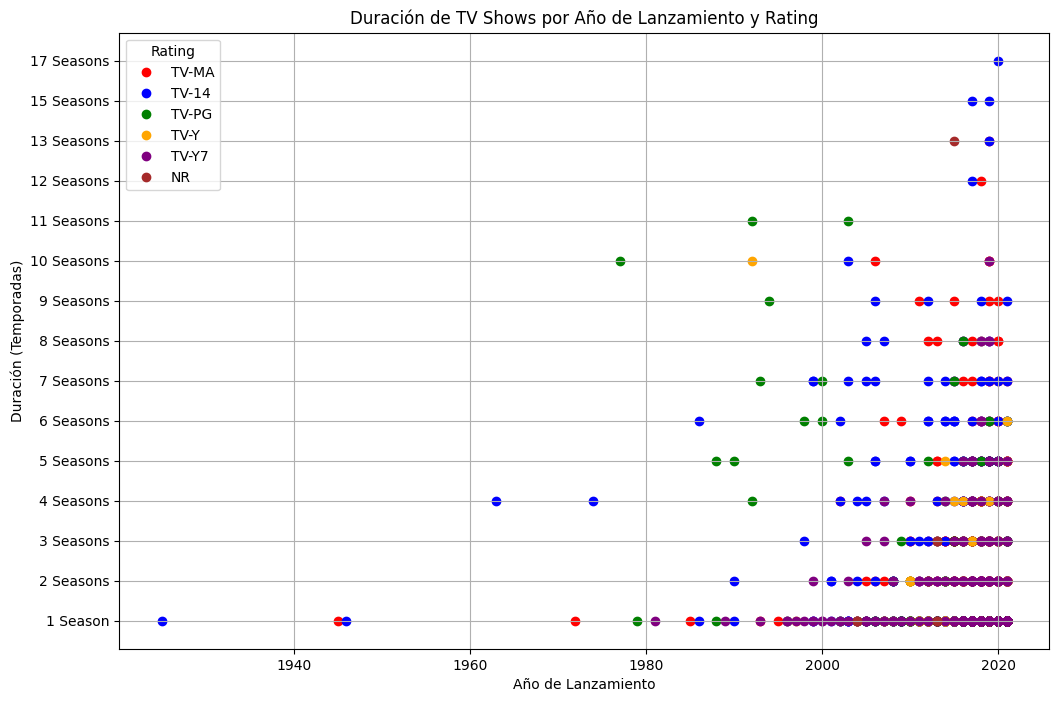

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos desde el archivo CSV
df = pd.read_csv('netflix_titles.csv')

# Filtrar solo los registros de tipo "TV Show"
df_tv_shows = df[df['type'] == 'TV Show']

# Definir la lista de duraciones ordenada
durations = ['1 Season', '2 Seasons', '3 Seasons', '4 Seasons', '5 Seasons', '6 Seasons', 
             '7 Seasons', '8 Seasons', '9 Seasons', '10 Seasons', '11 Seasons', '12 Seasons', 
             '13 Seasons', '15 Seasons', '17 Seasons']

# Truncar la fecha de lanzamiento al año
df_tv_shows['release_year'] = pd.to_datetime(df_tv_shows['release_year'], format='%Y').dt.year

# Eliminar filas con valores nulos en 'release_year'
df_tv_shows = df_tv_shows.dropna(subset=['release_year'])

# Crear un diccionario para mapear colores a ratings
color_map = {'TV-MA': 'red', 'TV-14': 'blue', 'TV-PG': 'green', 'TV-Y': 'orange', 'TV-Y7': 'purple', 'NR': 'brown'}

# Graficar histograma
plt.figure(figsize=(12, 8))
for duration in durations:
    subset = df_tv_shows[df_tv_shows['duration'] == duration]
    for rating, color in color_map.items():
        subset_rating = subset[subset['rating'] == rating]
        plt.scatter(subset_rating['release_year'], subset_rating['duration'], label=duration, c=color)

# Agregar la leyenda para cada rating
handles = [plt.Line2D([], [], marker='o', color=color, linestyle='', label=rating) for rating, color in color_map.items()]
plt.legend(handles=handles, title='Rating')
        
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Duración (Temporadas)')
plt.title('Duración de TV Shows por Año de Lanzamiento y Rating')
plt.grid(True)
plt.show()
#Del siguiente grafico podemos sacar las siguientes conclusiones:
#1.- TV_14 es el unico que ha lanzado un TV Show de 17 temporadas
#2.- Entre el 2010 y 2020, TV-Y7 lanzo una gran cantidad de TV Shows de 1 temporada